In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score

df = pd.read_csv('top50.csv', encoding='ISO-8859-1')

print(df.head())

   Unnamed: 0                       Track.Name    Artist.Name           Genre  \
0           1                         Señorita   Shawn Mendes    canadian pop   
1           2                            China       Anuel AA  reggaeton flow   
2           3    boyfriend (with Social House)  Ariana Grande       dance pop   
3           4  Beautiful People (feat. Khalid)     Ed Sheeran             pop   
4           5      Goodbyes (Feat. Young Thug)    Post Malone         dfw rap   

   Beats.Per.Minute  Energy  Danceability  Loudness..dB..  Liveness  Valence.  \
0               117      55            76              -6         8        75   
1               105      81            79              -4         8        61   
2               190      80            40              -4        16        70   
3                93      65            64              -8         8        55   
4               150      65            58              -4        11        18   

   Length.  Acousticness..

In [78]:
df.rename(columns={
    'Track.Name': 'Track',
    'Artist.Name': 'Artist',
    'Popularity': 'Popularity',
    'Beats.Per.Minute': 'Tempo',
    'Length.': 'Length',
    'Valence.': 'Valence',
    'Loudness..dB..': 'Loudness',
    'Speechiness.': 'Speechiness',
    'Acousticness..': 'Acousticness'
}, inplace=True)

features = ['Tempo', 'Energy', 'Danceability', 'Loudness',
            'Liveness', 'Valence', 'Length', 'Acousticness', 'Speechiness']
X = df[[
    'Tempo', 'Energy', 'Danceability', 'Loudness',
    'Liveness', 'Valence', 'Length', 'Acousticness', 'Speechiness'
]]

y = df['Popularity']

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [68]:
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.2f}")
print(f"R² Score: {r2:.2f}")

MAE: 4.23
R² Score: -0.21


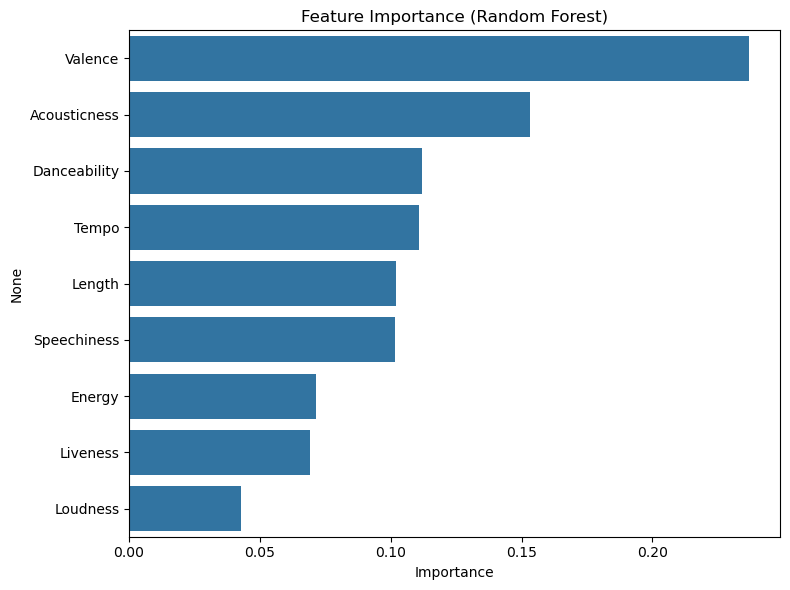

In [70]:
feature_importance = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(8, 6))
sns.barplot(x=feature_importance.values, y=feature_importance.index)
plt.title("Feature Importance (Random Forest)")
plt.xlabel("Importance")
plt.tight_layout()

plt.show()

In [72]:
errors = abs(y_test - y_pred)
error_df = X_test.copy()
error_df['Track'] = df.loc[y_test.index, 'Track'].values
error_df['Artist'] = df.loc[y_test.index, 'Artist'].values
error_df['actual'] = y_test.values
error_df['predicted'] = y_pred
error_df['error'] = errors

worst = error_df.sort_values(by='error', ascending=False).head(5)

print(worst[['Track', 'Artist', 'actual', 'predicted', 'error']])

                                                Track            Artist  \
25                                If I Can't Have You      Shawn Mendes   
39  fuck, i'm lonely (with Anne-Marie) - from 13 ...              Lauv   
26                                       Dance Monkey       Tones and I   
17      Sunflower - Spider-Man: Into the Spider-Verse       Post Malone   
30                                           Takeaway  The Chainsmokers   

    actual  predicted  error  
25      70      88.23  18.23  
39      78      87.20   9.20  
26      83      88.12   5.12  
17      91      86.58   4.42  
30      84      86.17   2.17  
